<a href="https://colab.research.google.com/github/jmorand1/Se-ales/blob/master/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***DESARROLLO TALLER 1***
Juan Sebastián Morán 818048
Universidad Nacional de Colombia - sede Manizales


---
**Abrir en Colab para vizualizar el contenido completo**


 # $\Rightarrow$ Evaluar la expresión

$$\int_{-\infty}^{\infty} t^{2} e^{- \sin{\left (t \right )}} \cos{\left (2 t \right )} \delta\left(2 t - 2 \pi\right)dt \rightarrow Ec.1$$
Nota: Consultar las propiedas de selectividad y escala en eltiempo de la funcion impulso unitario. Comprobar el resultado en simulacion con la librería SymPy.




###Desarrollo
Por propiedades de la función delta de Dirac se tiene que:
$$\int_{-\infty}^{\infty}f(t) \delta\left(t - t_o\right)dt = f(t_o) \rightarrow Ec.2 $$

Así mismo también se sabe que:
$$\delta\left(at - t_o\right) = \mid a \mid^{-1}\delta(x-\frac{t_o}{a}) \rightarrow Ec.3 $$ 

Ahora, tomando $\delta\left(2 t - 2 \pi\right)$ de la Ec.1 y aplicándole la propiedad de la Ec.3 se obtiene que:

$$\delta\left(2 t - 2 \pi\right) = \frac{1}{2}\delta(t-\pi) \rightarrow Ec.4$$

Reemplazando la Ec.4 en la Ec.1 obtenemos:
$$\int_{-\infty}^{\infty} t^{2} e^{- \sin{\left (t \right )}} \cos{\left (2 t \right )} \frac{1}{2}\delta(t-\pi)dt \rightarrow Ec.5$$

Finalmente, aplicando la propiedad de la Ec.2 en la Ec.5 se obtiene:
$$\int_{-\infty}^{\infty} t^{2} e^{- \sin{\left (t \right )}} \cos{\left (2 t \right )} \frac{1}{2}\delta(t-\pi)dt = \frac{1}{2}\pi^2e^{-sin(\pi)}cos(2\pi) = \frac{\pi^2}{2} \rightarrow Solucion$$

##Simulación 1

In [0]:
import sympy as sp
from sympy import init_printing
init_printing()
t = sp.symbols('t', real = True)
d = sp.DiracDelta((2*t)-2*(sp.pi))
x = (t**2)*(sp.exp(-(sp.sin(t))))*(sp.cos(2*t))

xi = x*d
xii = sp.integrate(xi,(t,-(sp.oo),sp.oo))
xii

$$\frac{\pi^{2}}{2}$$


---




#$\Rightarrow$Sea $x(t) = u(t- t_o)- u(t- nt_o)- k\delta (t- mt_o).$ Determine el valor de $k$ para el cual $\int_{-\infty}^{\infty}{x(t)}dt = 0.$ Comprobar el resultado en simulacion con la librería SymPy.

###Desarrollo
Tomamos:
$$a = u(t- t_o)- u(t- nt_o)$$ 
y
$$ b = k\delta (t- mt_o)$$
así:
$$x(t) = a-b$$

$$\int_{-\infty}^{\infty}{x(t)}dt = \int_{-\infty}^{\infty}adt-\int_{-\infty}^{\infty}bdt = 0$$

Resolvemos $\int_{-\infty}^{\infty}adt$ :
$$\int_{-\infty}^{\infty}adt = \int_{-\infty}^{\infty}u(t- t_o)- u(t- nt_o)dt = \int_{t_o}^{nt_o}dt = \mid nt_o-t_o\mid $$ 

Resolvemos 
$\int_{-\infty}^{\infty}bdt$

$$\int_{-\infty}^{\infty}bdt = \int_{-\infty}^{\infty}k\delta (t- mt_o) = k$$

Por lo tanto:
$$\mid nt_o-t_o\mid-k = 0$$

$$k = \mid nt_o-t_o\mid = \mid t_o(n-1) \mid$$

##Simulación 2

In [0]:
import sympy as sp
from sympy import init_printing
init_printing()
t, to, n, k, m = sp.symbols('t to n k m', real = True)
a = sp.Heaviside(t-to)-sp.Heaviside(t-n*to)
ai = sp.integrate(1,(t,to,n*to))
ai


$$n to - to$$

In [0]:
b = k*sp.DiracDelta(t-m*to)
bi = sp.integrate(b,(t,-(sp.oo),sp.oo))
bi

$$k$$

In [0]:
ec = sp.Eq(ai-bi,0)
sp.solve(ec,k)

Resolviendo para k:
$$k = \left [ to \left(n - 1\right)\right ]$$


---



 # $\Rightarrow$Consulte en que consisten las señales cuasiperiódicas. Luego, demuestre la periodicidad o no de las siguientes señales:

*   $x(t) = 3 cos(\omega t)$
*   $x(t) = 2 sin(\omega t + \pi )$
*   $ x(t) = 3 sin(\sqrt{3}t) + 3 sin(5t) -  2 cos(t/\sqrt{3})$
*   $ x(t) = 3 sin(4t) -  2 cos(50t) + 2 cos(10t)$
*   $x(t) = e^{j\omega t}$







###Desarrollo




##• $x(t) = 3 cos(\omega t)$
---
Se hace $x(t-T)$ 

\begin{align}x(t-T)= 3 cos(\omega(t-T))\end{align}

\begin{align}3cos(\omega(t-T))=3[cos(\omega t)cos(\omega T)+sen(\omega t)sen(\omega T)]\end{align}

Se remplaza: $\omega = \frac{2\pi}{T_o}$ con $T_o = T$

$$3cos(\omega(t-T)) = 3 [cos(\omega t)cos(\frac{2\pi}{T}T )+sen(\omega t)sen(\frac{2\pi}{T} T)]$$

$$3cos(\omega(t-T))=3[cos(\omega t)]$$ por lo tanto $x(t) = 3 cos(\omega t) = 3cos(\omega (t-T))$ es una función periódica

###**Gráfico**

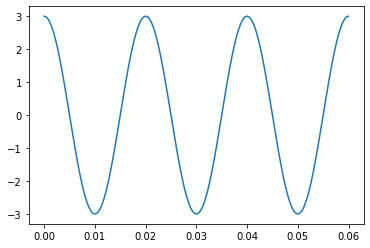

In [0]:
import numpy as np
import matplotlib.pyplot as plt
w = 100*np.pi
f = w/(2*np.pi)
T = 1/f
t = np.linspace(0,3*T,1000)
x = 3*np.cos(w*t)
plt.plot(t,x)


##• **$x(t) = 2 sin(\omega t + \pi ) = -2sin(\omega t)$**
---

Se hace $x(t+T)$
$$x(t+T) = 2sin(\omega (t+T) + \pi)$$

$$2sin(\omega (t+T) + \pi) = 2[sin(\omega (t+T))cos(\pi)+sin(\pi)cos(\omega(t+T))]$$

$$2sin(\omega (t+T) + \pi) = -2[sin(\omega(t+T))]$$

$$2sin(\omega (t+T) + \pi) = -2[sin(\omega t)cos(\omega T)+sin(\omega T)cos(\omega t)]$$

Se remplaza: $\omega = \frac{2\pi}{T_o}$ con $T_o = T$

$$2sin(\omega (t+T) + \pi) = -2[sin(\omega t)cos(\frac{2\pi}{T}T)+sin(\frac{2\pi}{T}T)cos(\omega t)]$$

$$2sin(\omega (t+T) + \pi) = -2sin(\omega t)$$

Por lo tanto $x(t) = 2 sin(\omega t + \pi )  = 2sin(\omega(t+T)+\pi) = -2sin(\omega t) $ y es una función periódica



###**Gráfico**

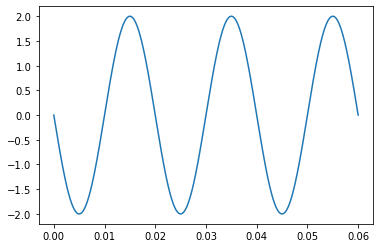

In [0]:
w = 100*np.pi
f = w/(2*np.pi)
T = 1/f
t = np.linspace(0,3*T,1000)
x = 2*np.sin(w*t+np.pi)
plt.plot(t,x)

##•$ x(t) = 3 sin(\sqrt{3}t) + 3 sin(5t) -  2 cos(t/\sqrt{3})$
---
Revisando las frecuencias angulares se observa como hay $\sqrt{3}$, por lo tanto la función no es cuasiperiódica


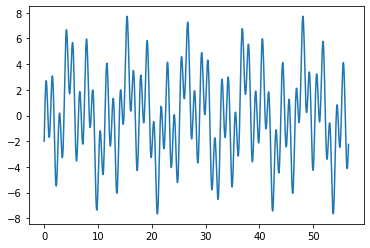

In [0]:
w = 100*np.pi
f = w/(2*np.pi)
T = 6*np.pi
t = np.linspace(0,3*T,1000)
x = 3*np.sin(np.sqrt(3)*t)+3*np.sin(5*t)-2*np.cos(t/np.sqrt(3))
plt.plot(t,x)

##•$ x(t) = 3 sin(4t) -  2 cos(50t) + 2 cos(10t)$
---
Se hace $\omega_1 = 4, \omega_2 = 50, \omega_3 = 10$

$\frac{\omega_1}{\omega_2}, \frac{\omega_1}{\omega_3}, \frac{\omega_2}{\omega_3}$ son entero sobre entero

Se encuentran los periodos:

$T_1 = \frac{\pi}{2}; T_2 = \frac{\pi}{25}; T_3 = \frac{\pi}{5}$

Para facilitar las cosas se multiplica por 50 y se divide entre $\pi$, teniendo que encontrar el mcm de 25, 2, 10 el cuál es ***50***.

Ahora, con la expresión $25k_1=2k_2=10k_3=T=50$ se obtiene los valores de $k_1,k_2$ y $k_3$:

$k_1 = 2$

$k_2 = 25$

$k_3 = 5$

Finalmente remplazando los valores anteriores en la expresión original: $k_1\frac{\pi}{2} = k_2\frac{\pi}{25} = k_3\frac{\pi}{5} = T$

$$T = \pi$$

Y la función es cuasiperiódica

###**Gráfico**

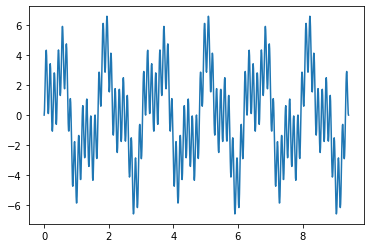

In [0]:
T = np.pi
N = 1000
t = np.linspace(0,3*T,N)
x = 3*np.sin(4*t) - 2*np.cos(50*t) + 2*np.cos(10*t)
plt.plot(t,x)

##• $x(t) = e^{j\omega t}$

Se hace $e^{j\omega (t+T)}$
$$e^{j\omega (t+T)} = e^{ j\omega t}e^{j\omega T}$$ 

Y se expande las funciones en senos y cosenos
$$e^{j\omega(t+T)}=[cos(\omega t)+jsen(\omega t)][cos(\omega T)+jsen(\omega T)]$$

Ahora, remplazamos $\omega$ por $\frac{2\pi}{ T_o}$ con $T_o = T$
$$e^{j\omega(t+T)}=[cos(\omega t)+jsen(\omega t)][cos(2\pi)+jsen(2\pi)]$$

Obteniendo 
$$e^{j\omega(t+T)}=cos(\omega t)+jsen(\omega t) = e^{j\omega t}$$
Por lo tanto $e^{j\omega t}$ es una función periódica

###**Gráfico**

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


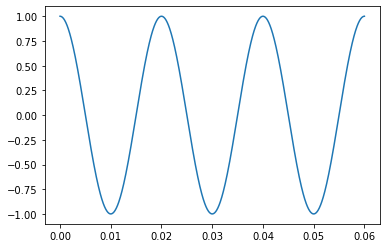

In [0]:
w = 100*np.pi
f = w/(2*np.pi)
T = 1/f
t = np.linspace(0,3*T,1000)
x = np.exp(w*(0+1j)*t)
plt.plot(t,x)


---

 # $\Rightarrow$Clasifique segun su tipo (energía o potencia):


*   $x(t) = - 3t + 1; \forall t \in  [0, 5]$
*   $x(t) = A cos(\omega t) + B sin(\omega t); A, B, \omega  \in  \mathbb{R}^+$
*   $x(t) = ate^{- tk} (u(t) -  u(t -  t_o)) ; a, k\in \mathbb{R}; t_o > 0$
*   $x[n] = nu[n]; n \in  \{0, \pm 1, \pm 2, . . . , \pm N\}$
*   $x[n] = cos[n\pi ] + sin[2n\pi /3]; n \in  \{0, 1, . . . , N\}; N \in  \mathbb{N}$
*   $x[n] = A cos[n\pi ]u[n -  n_o]; A \in  \mathbb{R}^+$ y $n \in  \{0 \pm 1, \pm 2, . . . , \pm N\}; 0 < n_o < N$



##•$x(t) = - 3t + 1; \forall t \in  [0, 5]$
---
Se hace $E_x = \int_{0}^{5}x(t)^2dt$

$$E_x = \int_{0}^{5}(-3t+1)^2dt$$

$$E_x = \int_{0}^{5}(9t^2-6t+1)dt$$

$$E_x = 3t^3+3t^2+t = t(3t^2+3t+1)\Big|_0^5$$

$$E_x = 0<305<\infty$$

Por lo tanto $x(t)$ es de energía


###**Gráfico**

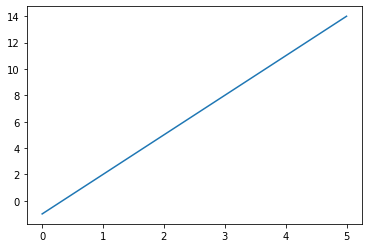

In [0]:
import sympy as sp
from sympy import init_printing
init_printing()
t= sp.symbols('t', real = True)
E= (sp.Abs(3*t-1))**2
Ex = sp.integrate(E,(t,0,5))
##gráfica
tg = np.linspace(0,5,1000)
x = 3*tg-1
plt.plot(tg,x)
Ex

$$E_x = 305$$

##•$x(t) = A cos(\omega t) + B sin(\omega t); A, B, \omega  \in  \mathbb{R}^+$
---
Se hace $E_x =\int_{-T/2}^{T/2} \mid(A cos(\omega t) + B sin(\omega t)\mid^2dt$ con $T_o = \frac{2\pi}{\omega}$


$$E_x = \int_{-T/2}^{T/2} \mid(A cos(\omega t) + B sin(\omega t)\mid^2dt$$

$$E_x = A^2\int_{-T/2}^{T/2} cos^2(\omega t)dt + 2AB\int_{-T/2}^{T/2} cos(\omega t)sin(\omega t)dt+B^2\int_{-T/2}^{T/2} sin^2(\omega t)dt$$

$$E_x = \frac{A^2}{2}(t+\frac{1}{2\omega}sin(2\omega t)) -\frac{AB}{4\omega}cos(2\omega t)+B^2(\frac{1}{2}t-\frac{1}{4\omega}sin(2\omega t))\Big|_{t=T/2}^{t=T/2}$$

$$E_x = \frac{ A^{2}}{2}T_o + \frac{B^{2}}{2}T_o = \frac{T_o}{2}(A^2+B^2)$$

Aplicando el límite:
$$ E_x = \lim_{T_o \to \infty} \frac{T_o}{2}(A^2 + B^2) = \infty$$

Ahora hallamos la potencia 
$$P_x =\frac{T_o}{2T_o}(A^2+B^2) = \frac{1}{2}(A^2+B^2) \rightarrow 0<\frac{1}{2}(A^2+B^2)<\infty$$
**La señal es de potencia**

###**Gráfico**

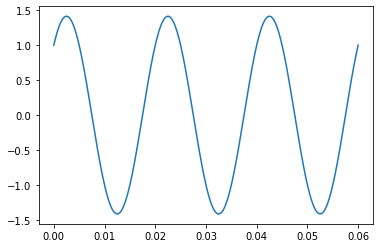

In [0]:
w = 100*np.pi
f = w/(2*np.pi)
To = 1/f
A = 1
B = 1
t = np.linspace(0,3*To,1000)
x = A*np.cos(w*t)+B*np.sin(w*t)
plt.plot(t,x)

##•$x(t) = ate^{- tk} (u(t) -  u(t -  t_o)) ; a, k\in \mathbb{R}; t_o > 0$
---
Se hace $E_x = \int_{-\infty}^{\infty}(ate^{- tk} (u(t) -  u(t -  t_o)))^2dt$

$$E_x = \int_{-\infty}^{\infty}(ate^{- tk} (u(t) -  u(t -  t_o)))^2dt=\int_{0}^{t_o}a^2t^2e^{- 2tk}dt = -\frac{a^2e^{-2kt}\left(2k^2t^2+2kt+1\right)}{4k^3}\Big|_{t = 0}^{t = t_o}$$

$$E_x = \int_{0}^{t_o}a^2t^2e^{-2tk}dt=-\frac{a^2\left(2k^2e^{-2kt_o}t_o^2+e^{-2kt_o}\left(2kt_o+1\right)-1\right)}{4k^3}$$


Se evalua $ E_x = \lim_{t_o \to \infty}-\frac{a^2\left(2k^2e^{-2kt_o}t_o^2+e^{-2kt_o}\left(2kt_o+1\right)-1\right)}{4k^3}$ para $k$ positivo y $k$ negativo

$\rightarrow$ **Para $k$ positivo:**
$$ E_x = \lim_{t_o \to \infty}-\frac{a^2\left(2k^2e^{-2kt_o}t_o^2+e^{-2kt_o}\left(2kt_o+1\right)-1\right)}{4k^3} = \frac{a^2}{4k^3}$$
Por lo tanto la señal es de energía

$\rightarrow$ **Para $k$ negativo:**
$$E_x = \lim_{t_o \to \infty}-\frac{a^2\left(2k^2e^{-2kt_o}t_o^2+e^{-2kt_o}\left(2kt_o+1\right)-1\right)}{4k^3} = \infty$$
Entonces se mira si es de potencia:
$$P_x = \lim_{t_o \to \infty}-\frac{1}{t_o}\frac{a^2\left(2k^2e^{-2kt_o}t_o^2+e^{-2kt_o}\left(2kt_o+1\right)-1\right)}{4k^3} = \infty$$
Por lo tanto no es ni de energía ni de potencia.

###**Gráfico**

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


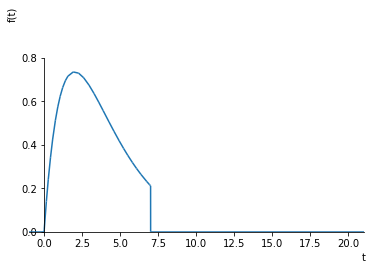

In [0]:
import sympy as sp
from sympy import init_printing
init_printing()
t,a = sp.symbols('t a', real = True)
to = sp.symbols('to', positive = True)
k = sp.symbols('k',positive = True)
f = a*t*sp.exp(-t*k)*(sp.Heaviside(t)-sp.Heaviside(t-to))
sp.plot(f.subs({a: 1, k : 0.5, to : 7}),(t,-1,21))

##•$x[n] = nu[n]; n \in  \{0, \pm 1, \pm 2, . . . , \pm N\}$
---
Se hace $E_x = \sum_{-\infty}^{\infty}\mid nu[n]\mid^2 = \sum_{0}^{\infty}n^2 = \infty$

Ahora se calcula la potencia con:$P_x = \lim_{N \to \infty}(\frac{1}{2N+1}\sum_{-N}^{N} \mid nu[n]\mid^2) = \lim_{N \to \infty}(\frac{1}{2N+1}\sum_{0}^{N} n^2) $; Esto diverge por lo tanto la dunción $x[n]$ no es de energía ni de potencia.



###**Gráfico**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

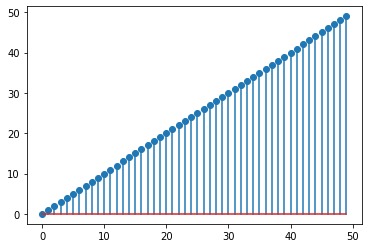

In [0]:
import numpy as np
import matplotlib.pyplot as plt
N = 50
n = np.arange(0,N,1)
f = n*np.heaviside(n,0)
plt.stem(n,f)

##•$x[n] = cos[n\pi ] + sin[2n\pi /3]; n \in  \{0, 1, . . . , N\}; N \in  \mathbb{N}$
---
Se hace
$$E_x =\sum_{0}^{N}\mid cos[n\pi ] + sin[2n\pi /3]\mid^2 = \sum_{0}^{N} [cos^2{n\pi}+2cos[n\pi]sen[2n\pi/3]+sen^2[2n\pi/3]]$$
$$E_x = \sum_{0}^{N}[1+2(-1)^nsen[2n\pi/3]+sen^2[2n\pi/3]]$$
$$E_x = N+1+\sum_{0}^{N}[2(-1)^nsen[2n\pi/3]+sen^2[2n\pi/3]]$$

Haciendo el límite
$$E_x = \lim_{N\to \infty}N+1+\sum_{0}^{N}[2(-1)^nsen[2n\pi/3]+sen^2[2n\pi/3]] = \infty$$
Por lo tanto la función $x[n]$ no es de energía

Ahora para ver si es de potencia 
$$P_x = \lim_{N\to \infty} \frac{E_x}{N+1} = \lim_{N\to \infty}\frac{N+1+\sum_{0}^{N}[2(-1)^nsen[2n\pi/3]+sen^2[2n\pi/3]]}{N+1}$$

$$P_x=\lim_{N\to \infty}[1+\frac{\sum_{0}^{N}[2(-1)^nsen[2n\pi/3]+sen^2[2n\pi/3]]}{N+1}]$$

Como $\lim_{N\to \infty}\sum_{0}^{N}[2(-1)^nsen[2n\pi/3]+sen^2[2n\pi/3]]$ crece más lento que $\lim_{N\to \infty}N+1$ entonces

$$P_x = 1$$
Y la función $x[n]$ es de potencia.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

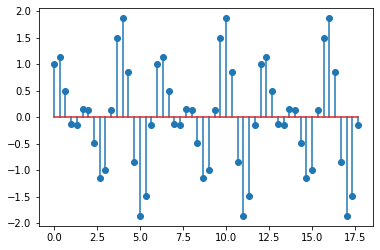

In [0]:
import numpy as np
import matplotlib.pyplot as plt
T = 6
F = 1/T
Fs= 2*F
n = np.arange(0,3*T,Fs)
f = np.cos(n*np.pi)+np.sin(2*n*np.pi/3)
plt.stem(n,f)

##•$x[n] = A cos[n\pi ]u[n -  n_o]; A \in  \mathbb{R}^+$ y $n \in  \{0 \pm 1,\pm 2, . . . , \pm N\}; 0 < n_o < N$
---
Se hace 
$$E_x = \lim_{N\to\infty}\sum_{-N}^{N}\mid  A cos[n\pi ]u[n -  n_o]\mid^2 = \lim_{N\to\infty}\sum_{n_o}^{N}A^2cos^2[n\pi] = \lim_{N\to\infty}A^2\sum_{n_o}^{N} cos^2[n\pi] \\= \lim_{N\to\infty}A^2\sum_{n_o}^{N} (-1)^{2n} = \lim_{N\to\infty}A^2\sum_{n_o}^{N} 1 = \lim_{N\to\infty} A^2(N-n_o+1) = \infty$$
Por lo tanto no es de energía

Se calcula la potencia
$$P_x = \lim_{N\to \infty} \frac{E_x}{2N+1} = \lim_{N\to \infty}\frac{A^2(N-n_o+1)}{2N+1}=\frac{A^2}{2}$$

Por lo tanto la función $x[n]$ es de potencia para $A>0$


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


<StemContainer object of 3 artists>

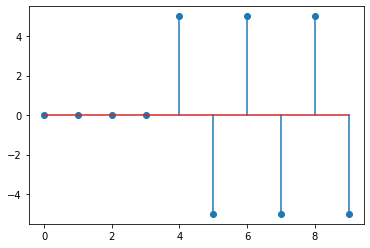

In [0]:
import numpy as np
import matplotlib.pyplot as plt
T = 2
A = 5
F = 1/T
Fs = 2*F
no = 2*T
n = np.arange(0,5*T,Fs)
u = n >= no
f = A*np.cos(n*np.pi)*u
plt.stem(n,f)

 --- 
#$\Rightarrow$ Se pretende muestrear la señal $x(t) = cos(\Omega t),$ con $t \in[0, T], \Omega = 2\pi F, F = 1/T$ y $F = 60 Hz$. Se emplea un sistema de discretizacion con frecuencia de muestreo $F_s = 90 Hz$. Demuestre si el sistema utilizado es apropiado para la señal $x(t)$ y estime la senal capturada. Realice una simulacion en Python del proceso de discretizacion.

###**$ \Rightarrow $ Solución:** 

$x(t) = cos(2\pi F t)$; $ F=60Hz $; $Fs = 90 Hz$

El sistema de discretización no es apropiado porque $F_s$ no cumple que:

$$ F_S \geq 2F $$
$$ 90hz \geq 2\text {x} 60hz $$
$$ 90hz \not\geq 120hz$$

Ahora para estimar la señal capturada se aplica $t = nT_s = n/F_s$ 

$$x[t = n T_s] =  cos[2\pi F nT_s]$$

$$x[t = n T_s] = cos[2\pi  \tfrac{F}{F_s} n] $$

Aplicando $\Omega_i = 2\pi f_i = 2\pi \tfrac{F_i}{F_s}$ ; Donde si $\Omega \in [-\pi,\pi]$ es original, de lo contrario es copia:

$\Omega = 2 \pi \tfrac{60}{90} = \frac{4}{3}\pi \in [-\pi,\pi]$ (Copia)

Como $\Omega$ es copia y está $2 \pi$ por encima de la original, es decir una vuelta por delante tenemos que hacer: 
$$\Omega^{original}= \Omega^{copia} - 2\pi$$
$$\Omega^{original}=  \frac{4}{3}\pi  - 2\pi = -\frac{2}{3}\pi \in [-\pi,\pi] \text {(Original)} $$ 

Después de encontrar el coseno original:

$x[n] = cos[-\frac{2}{3}\pi n]$ 

$x[n]$ es la señal discretizada con $F_s = 90Hz$



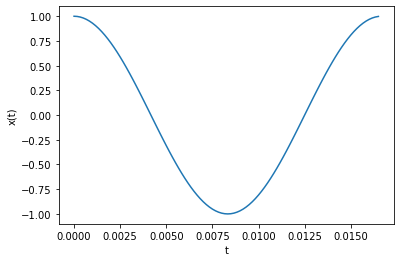

In [0]:
import numpy as np
import matplotlib.pyplot as plt

F = 60
w=2*np.pi*F

Fs = 100*F
T = 1/F
Ts = 1/Fs

t = np.arange(0,T,Ts) 

x = np.cos(w*t) 

plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

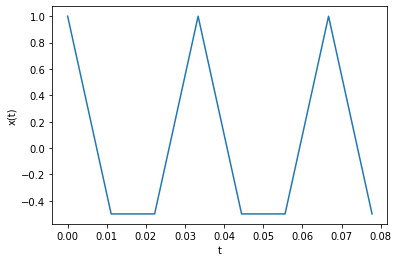

In [0]:
F = 60
w=2*np.pi*F

Fs = 90
T = 1/F
Ts = 1/Fs

t = np.arange(0,5*T,Ts) 

x = np.cos(w*t) 

plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

---
#$\Rightarrow$ Se tiene un microprocesador de 3 bits con entrada analoga entre 0 y 10 $[v]$. Describa las condiciones necesarias para que el microprocesador pueda digitalizar la señal $x(t) = 9 cos(200\pi t)$. Presente una simulacion en Python de dicho proceso para un ciclo de la señal $x(t)$.

###**$\Rightarrow$ Sol:**

Primero se encuentra la frecuencia de muestreo adecuada, para ello se encuentra la frecuencia fundamental $F$:
$$\omega = 200 \pi$$
$$F = \frac{\omega}{2\pi} = 100 $$

Con esta frecuencia, según el teorema de Nyquist la frecuencia de muestreo $F_s \geq 2F$

Por lo tanto la frecuencia de muestreo $F_s$ del micropocesador debe ser al menos de $\text{200Hz}$

También, debido a que el microprocesador tiene entrada análoga entre 0v y 10v se debe modificar la señal así:

Se plantea la función $y(t) = mx(t)+b$ tal que:
$$\begin{cases} y(t) = 0  & \rightarrow \: x(t)=-9\\ y(t) = 10 & \rightarrow\: x(t) =9  \end{cases} $$

Para encontrar $m$ se hace:

$$m = \frac{y_2-y_1}{x_2-x_1} = \frac{10}{18} = \frac{5}{9}$$

Y para determinar $b$ se hace:

$$b = y(t_o)-mx(t_o) \\  y(t_o) = 0 ; x(t_o) = -9 \\ b = 0 - \frac{5}{9}(-9) = 5$$

Por lo tanto la nueva señal modificada, para que el microprocesador pueda digitalizar la señal original, debe ser:

$$y(t) = 5cos(200\pi t)+5$$

Ahora para discretizar la señal se aplica $t = nT_s = n/F_s$ :

$$y[t = n T_s] =  5cos[2\pi F nT_s]+5$$

$$y[t = n T_s] = 5cos[2\pi  \tfrac{F}{F_s} n]+5 $$

$$y[t = n T_s] = 5cos[ 2 \pi \tfrac{100}{200} n]+5 $$

$$y[t = n T_s] = 5cos[ \pi n]+5 $$

•Donde $y[n]$ es la señal discretizada con $Fs=200hz$.

Ahora para Digitalizar la señal: 

Con los 3 bits del microprocesador se obtienen 8 posibles estados ($2^3=8$), con tamaño de paso en voltaje igual a $\Delta v = 10/8 = 1.25 [v]$ entonces los intervalos de la señal se aplica la siguiente etapa de cuantización:

$$\begin{array}{c|c} \hline
x[n] &amp; x_c[n] &amp; Binario\\ \hline
[0.00,1.25) &amp; 0.00 &amp;0 0 0\\ \hline
[1.25,2.50) &amp; 1.25 &amp; 0 0 1\\ \hline
[2.50,3.75) &amp; 2.50 &amp; 0 1 0\\ \hline
[3.75,5.00] &amp; 3.75 &amp;0 1 1\\ \hline
[5.00,6.25] &amp; 5.00 &amp;1 0 0\\ \hline
[6.25,7.50] &amp; 6.25 &amp;1 0 1\\ \hline
[7.50,8.75] &amp; 7.50 &amp;1 1 0 \\ \hline
[8.75,10.00] &amp; 8.75 &amp;1 1 1\\ \hline
\end{array}$$



###**Simulación**

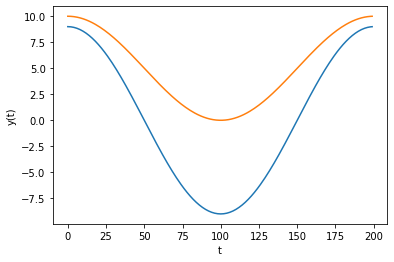

In [0]:
import numpy as np
import matplotlib.pyplot as plt

w = 200*np.pi
T = 2*np.pi/w
F = 1/T
Fd = 100
Fsc = 200*F
Fs = 2*Fd
Ts = 1/Fs
Tsc = 1/Fsc
t = np.arange(0,T,Tsc) 
td = np.arange(0,T,Ts) 

x = 9*np.cos(w*t) 
y = 5*np.cos(200*np.pi*t)+5
plt.plot(x)
plt.plot(y)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


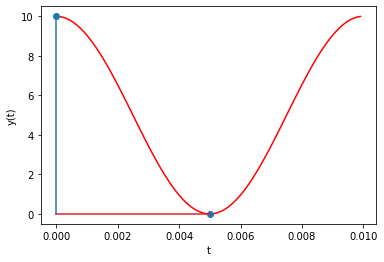

In [0]:
import numpy as np
import matplotlib.pyplot as plt

F = 100
w=2*np.pi*F
Fs = 2*F
T = 1/F
Ts = 1/Fs
t = np.arange(0,T,Ts) 
x = 5*np.cos(w*t)+5

Fy = 100
wy=2*np.pi*Fy
Fsy = 100*Fy
Ty = 1/Fy
Tsy = 1/Fsy
ty = np.arange(0,Ty,Tsy) 
y = 5*np.cos(wy*ty)+5

 
plt.plot(ty,y,color='r',label="y(t)")
plt.stem(t,x,label="y[n]")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()


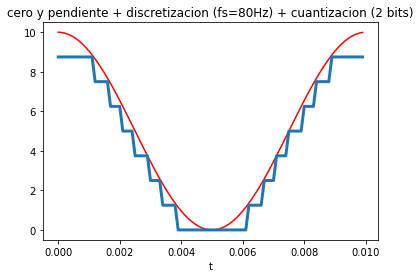

In [0]:
yc = np.zeros(len(y))

for i in range(len(y)):
    if y[i] < 1.25:
       yc[i] = 0
    elif (y[i] >= 1.25) and (y[i] <= 2.5):
        yc[i] = 1.25
    elif (y[i] >= 2.5) and (y[i] <= 3.75):
        yc[i] = 2.5
    elif (y[i] >= 3.75) and (y[i] <= 5):
        yc[i] = 3.75
    elif (y[i] >= 5) and (y[i] <= 6.25):
        yc[i] = 5
    elif (y[i] >= 6.25) and (y[i] <= 7.5):
        yc[i] = 6.25
    elif (y[i] >= 7.5) and (y[i] <= 8.75):
        yc[i] = 7.5
    else:
        yc[i] = 8.75
    
plt.plot(ty,y,color='r',label="y(t)")
plt.plot(ty,yc,label="$y_c[nTs]$",linewidth = 3)

plt.xlabel('t')
plt.title("cero y pendiente + discretizacion (fs=80Hz) + cuantizacion (2 bits)")
plt.show()

---
#$\Rightarrow$ Se tiene un sistema de discretizacion con frecuencia demuestreo $F_s = 40 Hz$, aplicado a las señales $x_1(t) = cos(20\pi t) \text{ y } x_2(t) = cos(100\pi t)$. ¿Las versiones discretizadas de las senales son distinguibles entre si?. Implemente simulacion en Python del proceso de discretizacion.

Se realiza el proceso de discretización para cada función

$\rightarrow$Para $x_1$:

$F_1 = 10Hz$

$t = nT_s$
$$x_1[t = nT_s] = cos[2\pi F n T_s] \\ x_1[t = nT_s] = cos[\frac{2n\pi F_1}{F_s}] = cos[\frac{n\pi}{2}]$$

$$x_1[n] = cos[\frac{n\pi}{2}]$$

$\rightarrow$Para $x_2$:

$F_2 = 50Hz$

$t = nT_s$
$$x_2[t = nT_s] = cos[2\pi F n T_s] \\ x_2[t = nT_s] = cos[\frac{n\pi F_2}{F_s}] = cos[\frac{5n\pi}{2}]$$

$$\Rightarrow \Omega_2\text{Es copia }\\ \Omega_{2original} = \Omega_{2copia}-2\pi\\\Omega_{2original}=\frac{5\pi}{2}-2\pi= \frac{\pi}{2} $$

$$\text{La señal discretizada es } x_2[n] = cos[\frac{n\pi}{2}]$$

Finalmente se concluye que $x_1[n]$ y $x_2[n]$ no son distinguibles entre sí debido a que tienen la misma frecuencia angular y se pueden sumar.

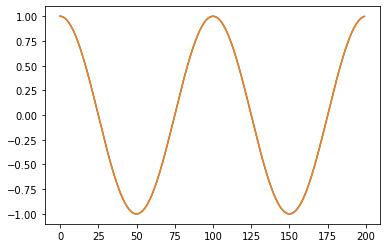

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


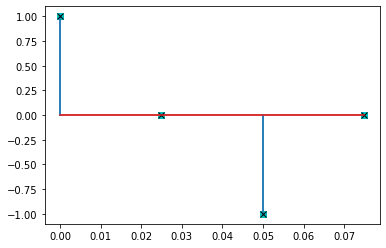

In [61]:
import numpy as np
import matplotlib.pyplot as plt

w1 = 20*np.pi
F1 = 10
F2 = 50
T1 = 1/F1
T2 = 1/F2
Fs= 40
Fs1 = 100*F1
Ts1 = 1/Fs1
Fs2 = 100*F2
Ts2 = 1/Fs2
#Señales contínuas
t1 = np.arange(0,2*T1,Ts1)
t2 = np.arange(0,2*T2,Ts2) 
x1 = np.cos(20*np.pi*t1)
x2 = np.cos(100*np.pi*t2)
plt.plot (x1)
plt.plot(x2)
plt.show()
#Señales discretizadas
F1d = 10
w1d=2*np.pi*F1d
Fs = 40
T1d = 1/F1d
Ts1d = 1/Fs
t1d = np.arange(0,T1d,Ts1d) 
x1d = np.cos(w1d*t1d)

F2d = 50
w2d=2*np.pi*F2d
T2d = 1/F2d
Ts2d = 1/Fs
t2d= np.arange(0,5*T2d,Ts2d) 
x2d = np.cos(w2d*t2d)
plt.stem(t1d , x1d,  markerfmt='sc')
plt.stem(t2d, x2d, markerfmt='xk')

plt.show()


---
#$\Rightarrow$ Cual es la frecuencia de muestreo limite apropiada para discretizar la señal $x(t) = 3 cos(2000-\pi t) + 5 sin(6000-\pi t) + 10 cos(12000-\pi t)$?. Si se utiliza una frecuencia de muestreo de 5kHz, cual es la señal discreta obtenida?

$$
\frac{\omega_1}{\omega_2} = \frac{2000\pi}{6000\pi} = 1/3 \\
\frac{\omega_1}{\omega_3} = \frac{2000\pi}{12000\pi}= 1/6\\
\frac{\omega_2}{\omega_3} = \frac{6000\pi}{12000\pi}= 1/2\\
$$
Las relaciones de $\omega$ son entero sobre entero por lo tanto $x(t)$ es cuasiperiódica.

Ahora se encuentra el periodo

$$k_1 T_1 = k_2 T_2 = k_3 T_3 = T$$ 
$$\text{mcm}(T_1,T_2,T_3)$$

$$k_1 \frac{1}{1000} = k_2 \frac{1}{3000} = k_3 \frac{1}{6000}= T$$

$$k_1 \frac{6000}{1000} = k_2 \frac{6000}{3000} = k_3 \frac{6000}{6000}$$ 

$$k_1 6 = k_2 2 = k_3 1$$

$$mcm(6,2,1) = 6$$

$$k_1 =1; k_2 = 3; k_3=6$$

$$\frac{1}{1000} = \frac{3}{3000} = \frac{6}{6000}= T = \frac{1}{1000}$$

Se realiza la discretización de $x(t) = 3 \cos(2000\pi t) + 5 \sin(6000\pi t) + 10 \cos(12000\pi t)$

$$t = nT_s = n/F_s$$; $F_1=1000$, $F_2=3000$; $F_3=6000$

$$x[t=n T_s] = 3 \cos[2\pi F_1 nT_s] + 5 \sin[2\pi F_2 nT_s] + 10 \cos[2\pi F_3 n T_s]$$

$$x[t=n T_s] = 3 \cos[2\pi  \tfrac{F_1}{F_s} n] + 5 \sin[2\pi \tfrac{F_2}{F_s}n] + 10 \cos[2\pi \tfrac{F_3}{F_s}n ]$$

$$\Omega_1 = 2 \pi \tfrac{1000}{5000} = \frac{2}{5}\pi \in [-\pi,\pi]\text{(Original)}$$

$$\Omega_2 = 2 \pi \tfrac{3000}{5000} = \frac{6}{5}\pi > \pi \text{(Copia)} \\ \Omega_{2original} = \frac{6}{5}\pi - 2\pi = -\frac{4\pi}{5}$$ 

$$\Omega_3 = 2 \pi \tfrac{6000}{5000} = \frac{12}{5}\pi > \pi \text{(Copia)} \\ \Omega_{3original} = \frac{12}{5}\pi - 2\pi = \frac{2\pi}{5}$$ 

Por lo tanto la señal discretizada sería:

$$x[n] = 3 \cos[\tfrac{2}{5}\pi n] + 5 \sin[\tfrac{-4}{5}\pi n] + 10 \cos[\tfrac{2}{5}\pi n ]$$

$x[n] = 13 \cos[\tfrac{2}{5}\pi n] + 5 \sin[\tfrac{-4}{5}\pi n] $

$x(t)$ debería ser muestreada con una $F_s \geq 2F_3$, es decir $F_s \geq 2 x 6000$; $F_s \geq 12000 [Hz]$.

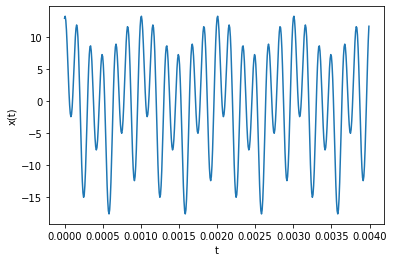

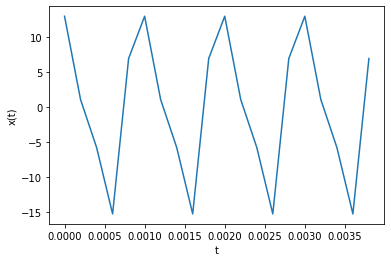

In [0]:
import numpy as np
import matplotlib.pyplot as plt
w1 = 2000*np.pi
w2 = 6000*np.pi
w3 = 12000*np.pi

f1 = w1/(2*np.pi)
f2 = w2/(2*np.pi)
f3 = w3/(2*np.pi)

fs1 =  5e3
fs = 20*f3
Ts = 1/fs
T1 = 1/f1
T2 = 1/f2
T3 = 1/f3
Ts1 = 1/fs1

t1 = np.arange(0,4*T1,Ts1)
t2 = np.arange(0,4*T1,Ts)

x = 3*np.cos(w1*t2) + 5*np.sin(w2*t2) + 10*np.cos(w3*t2)
plt.plot(t2,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

xd = 3*np.cos(w1*t1) + 5*np.sin(w2*t1) + 10*np.cos(w3*t1)
plt.plot(t1,xd)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

---
#$\Rightarrow$ Demuestre que funciones cosenoidales con frecuencia de oscilación $F_k = F_o + kF_s; \text{ con } k \in \mathbb{Z}$, no son distinguibles de la funcion $cos(2\pi F_ot)$ al utilizar un sistema de discretizacion con frecuencia de muestreo $F_s$. Realice simulaciones para $k \in \{0, \pm1, \pm 2, \pm3\}$

Se plantea: $x(t)=cos(2\pi(F_o + kF_s)t)+cos(2\pi F_ot)$ y se discretiza:

$$x[t = \frac{n}{F_s}] = cos[\frac{2\pi F_on}{F_s}]+ cos[2\pi\frac{(F_o+kF_s)n}{F_s}]$$

$$cos[2\pi\frac{(F_o+kF_s)n}{F_s}] = cos[\frac{[2\pi nF_o]}{F_s}+\frac{2\pi nkF_s}{F_s}] = cos[\frac{(2\pi nF_o)}{F_s}]cos[2\pi nk]-sen[\frac{(2\pi nF_o)}{F_s}]sen[2\pi nk]\\ = cos[\frac{(2\pi nF_o)}{F_s}]$$

$$x[t = \frac{n}{F_s}] = cos[\frac{2\pi F_on}{F_s}]+ cos[\frac{2\pi nF_o}{F_s}] = 2 cos[\frac{2\pi nF_o}{F_s}]$$

Las funciones cosenoidales con frecuencia de oscilación $F_k = F_o + kF_s; \text{ con } k \in \mathbb{Z}$, no son distinguibles de la funcion $cos(2\pi F_ot)$ debido a que aplicando álgebra finalmente obtenemos dos funciones cosenoidales con $\omega_k = \omega_o $, las cuales por tener sus frecuencias iguales se suman y por consiguiente no se puede distinguir la una de la otra.


---




/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


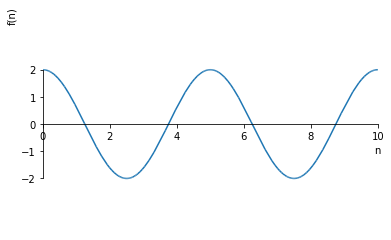

2*cos(2*pi*n/5)


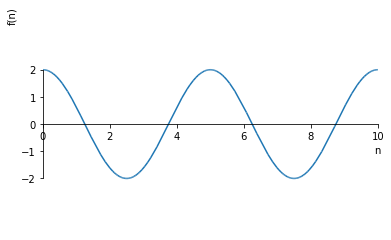

2*cos(2*pi*n/5)


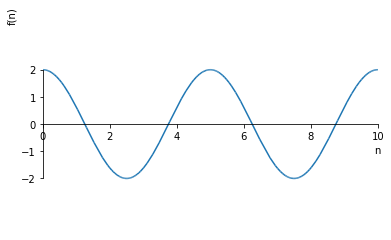

2*cos(2*pi*n/5)


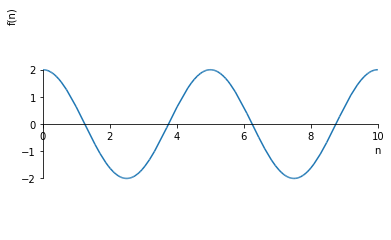

2*cos(2*pi*n/5)


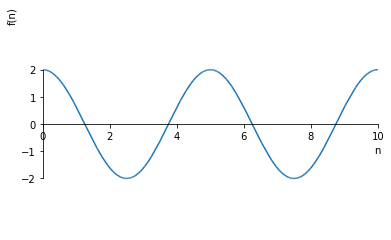

2*cos(2*pi*n/5)


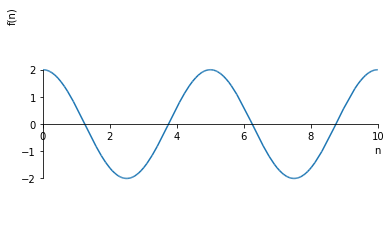

2*cos(2*pi*n/5)


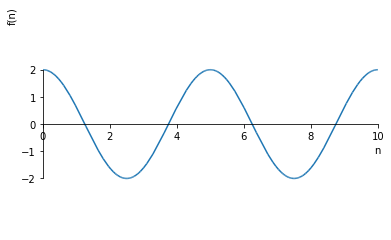

2*cos(2*pi*n/5)


In [0]:
import sympy as sp
from sympy import init_printing
init_printing()
n,k = sp.symbols('n k', integer = True)
Fo,Fs = sp.symbols('Fo Fs', real = True)

Fk=Fo+Fs*k


f= sp.cos(2*sp.pi*Fo*n/Fs)+sp.cos(2*sp.pi*Fo*n/Fs)*sp.cos(2*sp.pi*k*n)+sp.sin(2*sp.pi*Fo*n/Fs)*sp.sin(2*sp.pi*k*n)
ka = [-3,-2,-1,0,1,2,3]
for i in range(len(ka)):
  sp.plot(f.subs({Fo: 10, Fs : 50,k : ka[i]}),xlim=[0,10], ylim=[-4,4])
  print(f.subs({Fo: 10, Fs : 50,k : ka[i]}))
  i = i+1
f


---
#$\Rightarrow$ Demuestre si los siguientes sistemas de la forma $y = \tau \{x\}$,son sistemas lineales e invariantes en el tiempo (SLIT). Simule los sistemas en Python.

*  $y[n] = x[n]/3 + 2x[n -  1] -  y[n -  1]$
*  $y[n] = \sum_{k = -\infty}^nx[k]$
*  $y[n] = median(x[n]); \text{Donde median es la funcion mediana sobre una ventana de tamano 3}$
*  $y(t) = A_x(t) + B; A, B \in \mathbb{R}$



##$\Rightarrow$ $y[n] = x[n]/3 + 2x[n -  1] -  y[n -  1]$

---

$\rightarrow$Se comprueba linealidad (para este caso con $n = 1$)

Decimos que el sistema parte del reposo por lo tanto $y[0] = y[n-1] = 0$

$y^1[n] = \tau\{ax_1[n]+bx_2[n]\}$

$$y^1[n] = \frac{(ax_1[n]+bx_2[n])}{3}+2(ax_1[n-1]+bx_2[n-1])-y[n-1]\\y^1[n] = \frac{ax_1[n]}{3}+\frac{bx_2[n]}{3}+2ax_1[n-1]+2bx_2[n-1]-y[n-1]$$

$$y^1[n] = \frac{(ax_1[n]+bx_2[n])}{3}+2(ax_1[n-1]+bx_2[n-1])-y[n-1]\\y^1[n] = \frac{ax_1[n]}{3}+\frac{bx_2[n]}{3}+2ax_1[n-1]+2bx_2[n-1]-0$$

$$y^1[n] = \frac{(ax_1[n]+bx_2[n])}{3}+2(ax_1[n-1]+bx_2[n-1])-y[n-1]\\y^1[n] = \frac{ax_1[n]}{3}+\frac{bx_2[n]}{3}+2ax_1[n-1]+2bx_2[n-1]$$

$y^2[n]=a\tau\{x_1[n]\}+b\tau\{x_2[n]\}$

$$y^2[n]=\frac{ax_1[n]}{3}+2ax_1[n-1]-ay[n-1]+\frac{bx_2[n]}{3}+2ax_2[n-1]-by[n-1]$$

$$y^2[n]=\frac{ax_1[n]}{3}+2ax_1[n-1]-0+\frac{bx_2[n]}{3}+2ax_2[n-1]-0$$

$$y^2[n]=\frac{ax_1[n]}{3}+2ax_1[n-1]+\frac{bx_2[n]}{3}+2ax_2[n-1]$$

Debido a que $y^1[n] = y^2[n]$ el sistema es lineal.

$\rightarrow$Se comprueba invarianza:

$$y[n-n_o] = \tau\{x[n-n_o]\} = x[n-n_o]/3 + 2x[n-n_o -  1] -  y[n -  1]$$

$$y[n;n_o] = x[n-n_o]/3 + 2x[n-n_o -  1] -  y[n-n_o -  1]$$

Diciendo que $y[n-n_o -  1] = y[n-1]$ se concluye que:

Como $y[n-n_o] \not = y[n;n_o]$ el sistema es invariante y por lo tanto es $\text{SLIT}$ 






In [62]:
import numpy as np
import matplotlib.pyplot as plt

a=4
b=5
n=5
x1 = np.random.randint(0,10,n)
x2 = np.random.randint(0,10,n)
def sis(x):
  y = np.zeros(len(x))
  for i in range(1,len(y)):
    y[i]=x[i]/3+2*x[i-1]-y[i-1]  
  return y

y2 = a*sis(x1)+b*sis(x2)
x = a*x1+b*x2
y1 = sis(x)
for s in range(0,len(y1)):
  if(round(y1[s],10)==round(y2[s]),20):
    lin="Es Lineal"
  else:
    lin="No es Lineal"
print(lin)



Es Lineal


2


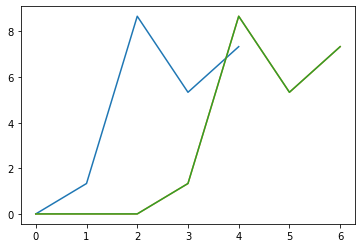

Es invariante


In [64]:
import numpy as np
import matplotlib.pyplot as plt
no = 2
print(no)
n=5
x = np.random.randint(0,10,n)
x[0] = 0
y3 = np.zeros(len(x))
y2 = np.zeros(len(x)+no)
y1 = np.zeros(len(x)+no)
def sis(x):
  y = np.zeros(len(x))
  for i in range(1,len(y)):
    y[i]=x[i]/3+2*x[i-1]-y[i-1] 
    #print(len(y)) 
  return y
z = np.zeros(no)
xn = np.hstack((z,x))
#print(len(xn))
#print(xn)
y3 = sis(x)
y1 = sis(xn)
y2 = np.hstack((z,y3))

plt.plot(y3)
plt.plot(y1)
plt.plot(y2)
plt.show()
if(y1==y2).all():
    print("Es invariante")
else:
    print("No es invariante")

##$\Rightarrow$ $y[n] = \sum_{k = -\infty}^nx[k]$

---

Se comprueba linealidad:

$y^1[n] = \tau\{ax_1[n]+bx_2[n]\}$

$$y^1[n]=\sum_{k = -\infty}^n(ax_1[k]+bx_2[k]) = a\sum_{k = -\infty}^n x_1[k]+b\sum_{k = -\infty}^n x_2[k]$$

$y^2[n]=a\tau\{x_1[n]\}+b\tau\{x_2[n]\}$

$$y^2[n]=a\sum_{k = -\infty}^n x_1[k]+b\sum_{k = -\infty}^n x_2[k]$$

El sistema es lineal debido a que $y^1[n] = y^2[n]$

Se compreuba invarianza:

Se alimenta el sistema con una entrada desplazada:

$$y[n-n_o]=\tau\{x(n-n_o)\} = \sum_{k=-\infty}^{n-n_o}(x[k])
$$

$$y[n;n_o]= \sum_{k=-\infty}^{n-n_o}(x[k])$$

Como $y[n-n_o] = y[n;n_o]$ el sistema es $\text{SLIT}$


In [0]:
import numpy as np
import matplotlib.pyplot as plt
a = 3
b = 5
n=5
x1 = np.random.randint(0,10,n)
x2 = np.random.randint(0,10,n)
y1 = np.zeros(len(x1))
y2 = np.zeros(len(x2))
def sis(x):
  y = np.zeros(len(x))
  ac = 0
  for i in range(len(x)):
    y[i] = ac + x[i]
    ac = ac+y[i]
  return y
x = a*x1+b*x2
y1 = sis(x)
y2 = a*sis(x1)+b*sis(x2)
if (y1==y2).all():
  print("Es lineal")
else:
  print("No es lineal")




Es lineal


5


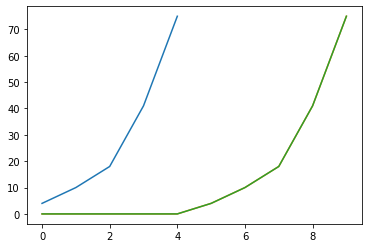

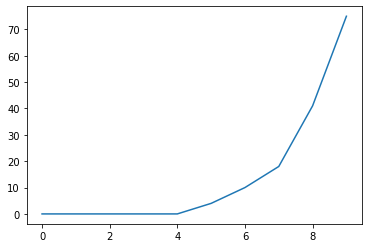

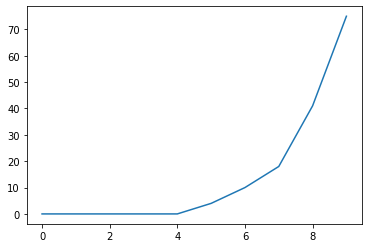

In [0]:
import numpy as np
import matplotlib.pyplot as plt
no = 5
print(no)
n=5
x = np.random.randint(0,10,n)
y3 = np.zeros(len(x))
y2 = np.zeros(len(x)+no)
y1 = np.zeros(len(x)+no)
def sis(x):
  y = np.zeros(len(x))
  ac = 0
  for i in range(len(x)):
    y[i] = ac + x[i]
    ac = ac+y[i]
  return y
z = np.zeros(no)
xn = np.hstack((z,x))
#print(len(xn))
#print(xn)
y3 = sis(x)
y1 = sis(xn)
y2 = np.hstack((z,y3))

plt.plot(y3)

plt.plot(y1)

plt.plot(y2)
plt.show()
plt.plot(y1)
plt.show()
plt.plot(y2)


---
##$\Rightarrow$ $y[n] = \text{median}(x[n])$; donde median es la funcion mediana sobre una ventana de tamaño 3.

$\rightarrow$Se comprueba linealidad:

$y^1[n] = \tau\{ax_1[n]+bx_2[n]\}$

$$y^1[n] = median(ax_1[n]+bx_2[n])$$
$$y^1[n] = median(x_c[n])$$

$y^2[n]=a\tau\{x_1[n]\}+b\tau\{x_2[n]\}$

$$y^2[n] = a\text{median}(x_1[n])+b\text{median}(x_2[n])$$

Debido a que $x_c[n] \not = a\text{median}(x_1[n])+b\text{median}(x_2[n])$ entonces $\Rightarrow y^1[n] \not= y^2[n]$ y el sistema no es lineal por lo tanto el sistema tampoco es $\text{SLIT}$.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

a=3
b=4
n=10

x1 = np.random.randint(1,10,n)
x2 = np.random.randint(1,10,n)

y1 = np.zeros(n)
y2 = np.zeros(n)

def sis(x):
  y = np.zeros(len(x)-2)
  xo = np.sort(x) 
  for i in range(0,len(x)-2):    
    y[i]= np.median(np.array([xo[i],xo[i+1],xo[i+2]])) 
  return y

x = a*x1+b*x2

y1 = sis(x)
y2 = a*sis(x1)+b*sis(x2)

print("y1=",y1)
print("y2=",y2)

if(y1==y2).all():
  print("Es lineal")
else:
  print("No es Lineal")

y1= [23. 32. 42. 42. 43. 45. 47. 47.]
y2= [23. 31. 38. 38. 41. 48. 51. 51.]
No es Lineal


---
##$\Rightarrow y(t) = A_x(t) + B; A, B \in \mathbb{R}$

Se comprueba linealidad:

$y^1(t) = \tau\{ax_1(t)+bx_2(t)\}$

$$y^1(t) = A(ax_1(t)+bx_2(t))+B$$

$y^2(t)=a\tau\{x_1(t)\}+b\tau\{x_2(t)\}$

$$y^2(t)=aAx_1(t)+aB+bAx_2(t)+bB$$

$$y^2(t) = A(ax_1(t)+bx_2(t))+B(a+b)$$

Debido a que $y^1(t) \not= y^2(t)$ el sistema no es lineal por lo tanto tampoco es $\text{SLIT}$


In [65]:
import sympy as sp
import matplotlib as plt
from sympy import init_printing
init_printing()
A,B,t,x,y,a,b = sp.symbols('A B t x y a b', Real = True)
x1 = t
x2 = t**2
y1 = A*(a*x1+b*x2)+B
y2 = A*(a*x1+b*x2)+B*(a+b)
if (y1 == y2):
  print('lineal')
else:
  print('No es lineal')
y1,y2

No es linea


$$\left ( A \left(a t + b t^{2}\right) + B, \quad A \left(a t + b t^{2}\right) + B \left(a + b\right)\right )$$

---
#$\Rightarrow$  Hallar la salida $y[n]$ de un SLIT ante la entrada $x[n]=\{- 1, 1, 3^\dagger , 0, 5, 6, - 1\}$, con respuesta al impulso $h[n]=\{1, - 2, 0^\dagger, 1, - 1\}$, donde $n \in\{0, \pm1, \pm2, . . . , \pm N\}$ y $n=0$ para $x[n]^\dagger $. Nota: Utilizar metodo gráfico para encontrar la salida y comprobar con simulacion en Python. Repita el proceso para el sistema con respuesta al escalon$\{- 3, 4, - 2, 3^\dagger , 1, - 1, 2, 5\}$.

$\rightarrow$ Se hace la convolución:

$$y[n]= \tau\{x[n]\}= x[n]*h[n]=\sum_{k=-7}^{7}x[k]h[n-k]; \quad \forall n\in\{0,\pm 1, \pm 2, \pm 3, \pm 4, \pm 5\, \pm 6, \pm 7\}$$

$$y[n] = \{-1,3,1,-7,7^\dagger,-2,-16,7,1,-7,1\}$$

$\rightarrow$ Para la respuesta al escalon, primero hay que encontrar la respuesta al impulso.

$$h[n] = s[n]-s[n-1] = \{ -3, 7, -6, 5^\dagger, -2,-2,3,3,5\}$$





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


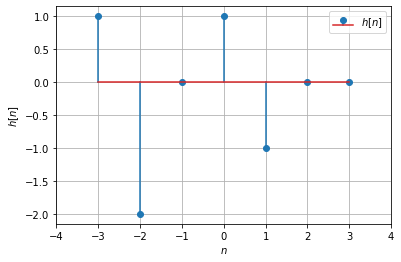

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


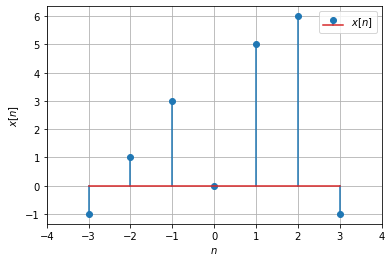

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


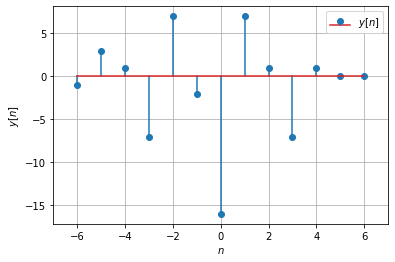

h[n]= [1, -2, 0, 1, -1, 0, 0]
y[n]= [ -1   3   1  -7   7  -2 -16   7   1  -7   1   0   0]


In [0]:
import numpy as np
import matplotlib.pyplot as plt

x=[-1,1,3,0,5,6,-1]
h=[1,-2,0,1,-1,0,0]

N = int(len(x)/2)
n = np.linspace(-N,N,2*N+1)

y = np.convolve(x,h)
ny = np.linspace(-2*N,2*N,4*N+1)

plt.stem(n, h, label=r'$h[n]$')
plt.xlim([-N-1,N+1])
plt.xlabel(r'$n$')
plt.ylabel(r'$h[n]$')
plt.grid()
plt.legend()
plt.show()

plt.stem(n, x, label=r'$x[n]$')
plt.xlim([-N-1,N+1])
plt.xlabel(r'$n$')
plt.ylabel(r'$x[n]$')
plt.grid()
plt.legend()
plt.show()


plt.stem(ny, y, label=r'$y[n]$')
plt.xlim([-2*N-1,2*N+1])
plt.xlabel(r'$n$')
plt.ylabel(r'$y[n]$')
plt.grid()
plt.legend()
plt.show()



print("h[n]=",h)
print("y[n]=",y)

[ 0  0 -3  7 -6  5 -2 -2  3  3 -5]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


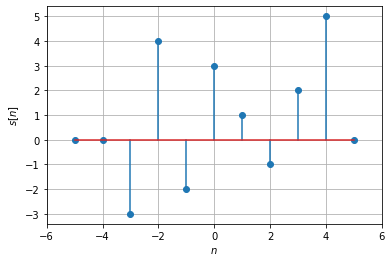

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


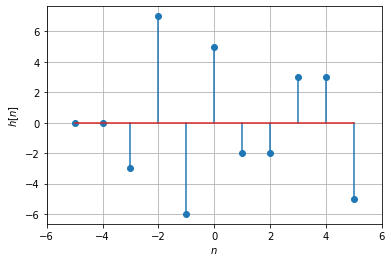

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


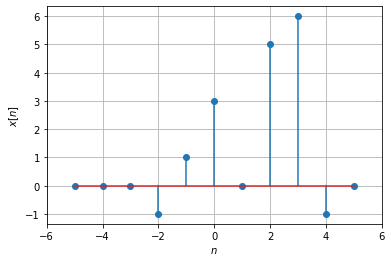

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


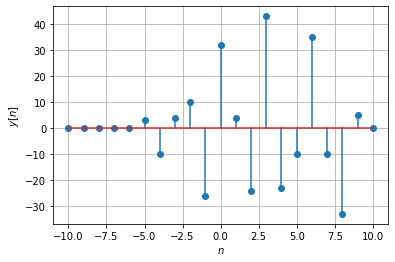

h[n]= [ 0  0 -3  7 -6  5 -2 -2  3  3 -5]
y[n]= [  0   0   0   0   0   3 -10   4  10 -26  32   4 -24  43 -23 -10  35 -10
 -33   5   0]


In [0]:
s = [0,0,-3, 4,-2, 3, 1,-1, 2, 5, 0]
x = [0,0, 0,-1, 1, 3, 0, 5, 6,-1, 0]
N = int(len(s)/2)
n = np.linspace(-N,N,2*N+1)

h = np.append(0,np.diff(s))
print(h)

plt.stem(n, s, label=r'$s[n]$')
plt.xlim([-N-1,N+1])
plt.xlabel(r'$n$')
plt.ylabel(r'$s[n]$')
plt.grid()
plt.show()

plt.stem(n, h, label=r'$h[n]$')
plt.xlim([-N-1,N+1])
plt.xlabel(r'$n$')
plt.ylabel(r'$h[n]$')
plt.grid()
plt.show()

plt.stem(n, x, label=r'$x[n]$')
plt.xlim([-N-1,N+1])
plt.xlabel(r'$n$')
plt.ylabel(r'$x[n]$')
plt.grid()
plt.show()


y = np.convolve(x,h)
ny = np.linspace(-2*N,2*N,4*N+1)
plt.stem(ny, y, label=r'$y[n]$')
plt.xlim([-2*N-1,2*N+1])
plt.xlabel(r'$n$')
plt.ylabel(r'$y[n]$')
plt.grid()
plt.show()

print("h[n]=",h)
print("y[n]=",y)

---
#$\Rightarrow$ Sea la señal Gaussiana $x(t) = e^{- at^2}$ con $a \in \mathbb{R}+$, el sistema $A$ con relacion entrada-salida $y_A(t) = x^2(t)$, y el sistema lineal e invariante con el tiempo B con respuesta al impulso $h_B(t) = Be^{- bt^2}$: 
*  **a)** Encuentre la salida del sistema en serie $x(t) \rightarrow h_B(t) \rightarrow y_A(t) \rightarrow y(t)$ 
*  **b)** Encuentre la salida del sistema en serie $x(t) \rightarrow y_A(t) \rightarrow h_B(t) \rightarrow y(t)$

a) $x(t)*h_B(t) = \int _{-\infty}^{\infty }x(\tau )h_B(t-\tau )d\tau $

$$e^{- at^2} * Be^{- bt^2} = \int _{-\infty }^{\infty }e^{- a\tau^2}Be^{- b(t-\tau )^2}d\tau = \frac{\sqrt{\pi}Be^{-\frac{abt^2}{b+a}}}{\sqrt{b+a}}$$

Ahora aplicamos el sistema $y_A(t) = x^2(t)$

$$y(t) = (x(t)*h_B(t))^2 = (\frac{\sqrt{\pi}Be^{-\frac{abt^2}{b+a}}}{\sqrt{b+a}})^2 = \frac{\pi(Be^{-\frac{abt^2}{b+a}})^2}{b+a}$$

b) Se aplica el sistema $y_A(t) a $x(t)$

$$x^2(t) = (e^{- at^2})^2 = e^{-2at^2}$$

Se hace la convolución:

$$y(t) = (x^2(t)*h_b(t))^2 = e^{- 2at^2} * Be^{- bt^2} = \int _{-\infty }^{\infty }e^{- 2a\tau^2}Be^{- b(t-\tau )^2}d\tau = \frac{\sqrt{\pi}Be^{-\frac{2abt^2}{b+2a}}}{\sqrt{b+2a}}$$